In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("combined.csv")

def convertToFloat(x):
    x=x.strip()
    if x=="-" or x=="NR" or x=='' or x=="." or x=="" or x==' ':
        return 0
    else:
        
        return float(x)
df["rain"]=df["Rain"].apply(convertToFloat)
# import datetime
df.pop("Rain")
aldf=df[df.District=="Alangayam"]
# df["month"]=df["Date"].apply(lambda x:datetime.datetime.strptime(x,"%Y-%m-%d").month)
# df["year"]=df["Date"].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d").year)
# df["day"]=df["Date"].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d").day)

In [2]:
dataset=aldf[["rain"]].values
dataset 

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [3]:
# !pip install keras==2.4.0
2+2

4

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow import keras

In [ ]:
keras.backend.backend()

'tensorflow'

In [5]:
import tensorflow
print(tensorflow.__version__)

2.3.1


In [ ]:
np.random.seed(7)

dataset=scaler.fit_transform(dataset)

NameError: name 'scaler' is not defined

In [8]:
def CreateDataset(dataset,lookback):
    DataX=[]
    DataY=[]
    for i in range(len(dataset)-lookback-1):
        DataX.append(dataset[i:(lookback+i),0])
        DataY.append(dataset[(lookback+i),0])
    return np.array(DataX),np.array(DataY)

In [9]:
trainX

NameError: name 'trainX' is not defined

In [10]:
trainsize=3287
testsize=365
train, test = dataset[0:trainsize,:], dataset[trainsize:len(dataset),:]

In [11]:
look_back=30
trainX,trainY=CreateDataset(train,look_back)
testX,testY=CreateDataset(test,look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [12]:
print(keras.__version__)

2.4.0


In [13]:
model = Sequential()

opt = keras.optimizers.Adam()
import time
model.add(keras.layers.Bidirectional(LSTM(4, input_shape=(1, look_back))))
model.add(Dense(1,activation="relu"))
model.compile(loss='mean_absolute_error', optimizer=opt)
a=time.time()
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
b=time.time()
print(b-a)

Epoch 1/100
3256/3256 - 4s - loss: 2.6767
Epoch 2/100
3256/3256 - 4s - loss: 2.6658
Epoch 3/100
3256/3256 - 4s - loss: 2.6642
Epoch 4/100
3256/3256 - 4s - loss: 2.6638
Epoch 5/100
3256/3256 - 4s - loss: 2.6606
Epoch 6/100
3256/3256 - 4s - loss: 2.6578
Epoch 7/100
3256/3256 - 4s - loss: 2.6513
Epoch 8/100
3256/3256 - 4s - loss: 2.6382
Epoch 9/100
3256/3256 - 4s - loss: 2.6356
Epoch 10/100
3256/3256 - 4s - loss: 2.6243
Epoch 11/100
3256/3256 - 4s - loss: 2.6132
Epoch 12/100
3256/3256 - 4s - loss: 2.6025
Epoch 13/100
3256/3256 - 4s - loss: 2.5923
Epoch 14/100
3256/3256 - 4s - loss: 2.5787
Epoch 15/100
3256/3256 - 4s - loss: 2.5672
Epoch 16/100
3256/3256 - 4s - loss: 2.5543
Epoch 17/100
3256/3256 - 3s - loss: 2.5529
Epoch 18/100
3256/3256 - 4s - loss: 2.5450
Epoch 19/100
3256/3256 - 3s - loss: 2.5293
Epoch 20/100
3256/3256 - 4s - loss: 2.5216
Epoch 21/100
3256/3256 - 4s - loss: 2.5043
Epoch 22/100
3256/3256 - 3s - loss: 2.4935
Epoch 23/100
3256/3256 - 3s - loss: 2.4811
Epoch 24/100
3256/32

In [14]:
import datetime
aldf["month"]=aldf["Date"].apply(lambda x:datetime.datetime.strptime(x,"%Y-%m-%d").month)
aldf["year"]=aldf["Date"].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d").year)
aldf["day"]=aldf["Date"].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d").day)

<ipython-input-14-a490510ba98d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aldf["month"]=aldf["Date"].apply(lambda x:datetime.datetime.strptime(x,"%Y-%m-%d").month)
<ipython-input-14-a490510ba98d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aldf["year"]=aldf["Date"].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d").year)
<ipython-input-14-a490510ba98d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [15]:
dnew=aldf[(aldf.year==2019)&(aldf.month>6)&(aldf.month<9)][["rain"]].values
mytest,myy=CreateDataset(dnew,30)

In [16]:
preds=model.predict(mytest.reshape(31,1,30))

In [17]:
preds=preds.reshape((31,))

In [18]:
days=[]
for i in range(1,32):
  days.append(i)


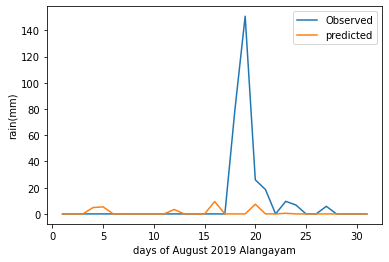

In [19]:
import matplotlib.pyplot as plt
plt.plot(days,myy,label="Observed")
plt.plot(days,preds,label="predicted")
plt.legend()
plt.xlabel("days of August 2019 Alangayam")
plt.ylabel("rain(mm)")
plt.savefig("LSTM.png",dpi=400)

In [ ]:
preds=model.predict(dnew.reshape((1,1,30)))

array([[0.]], dtype=float32)

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

from sklearn.metrics import mean_squared_error


ypred=testPredict.reshape(334)
ty=testY.reshape(334)

# rainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])

In [ ]:
import numpy as np
np.corrcoef(ty,ypred)

array([[1.        , 0.04785291],
       [0.04785291, 1.        ]])

In [ ]:
def RAE(a,b):
    ans=np.sqrt(((a-b)**2).sum())/np.sqrt((a**2).sum())
    return ans
RAE(ty,ypred)

0.9961040997625039

In [ ]:
def RRSE(a,b):
    mean=np.mean(a)
   
    ans=np.sqrt(((a-b)**2).sum()/((mean-a)**2).sum())
    return ans
RRSE(ty,ypred)

1.0243288736015759

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ty,ypred)

3.1337306953475865

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
np.sqrt(mean_squared_error(ty,ypred))

12.076026811272456

In [ ]:
ypred.shape

(334,)

In [ ]:
from prophet import prophet

ModuleNotFoundError: ignored

In [ ]:
!pip install prophet

     |████████████████████████████████| 71kB 3.5MB/s 
     |████████████████████████████████| 51kB 3.6MB/s 
     |████████████████████████████████| 184kB 6.4MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-cp37-none-any.whl size=6639552 sha256=541f9b962920ef6c1c57910f8fe2a5a8ae90dd770ef88160881f3347284a03dc
  Stored in directory: /root/.cache/pip/wheels/92/1d/02/bc0a91bd3a84e060722075d2b0b68e875e37ec7dc49451d513
Successfully built prophet
ERROR: fbprophet 0.7.1 has requirement cmdstanpy==0.9.5, but you'll have cmdstanpy 0.9.68 which is incompatible.
  Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [ ]:
from prophet import Prophet

In [ ]:
import pandas as pd
df=pd.read_csv("combined.csv")

In [ ]:
aldf=df[df.District=="Alangayam"]

In [ ]:
aldf.pop("District")
aldf.columns=["ds","y"]

In [ ]:
from datetime import datetime
aldf["ds"]=aldf["ds"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d"))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
m = Prophet()
m.fit(aldf,coerce_numeric=True)

ValueError: ignored

In [ ]:
aldf["Date"][0][0]=="2"

True

In [ ]:
for i in aldf["Date"]:
  if i[0]!="2":
    print(i[0])

In [ ]:
"-" in aldf["ds"]

False